# Övningsuppgifter i statistik

Läs in datasetet `diamonds` från Seaborn med `load_dataset()`-funktionen.

Undersök datasetet! Vilka variabler (kolumner) finns i datasetet? Vilken variabel tänker du är den beroende variabeln? 

Ta reda på medelvärde, varians och standardavvikelse för de olika variablerna.

Undersök hur värdena är fördelade i de olika kolumnerna (boxplots och histogram är bra verktyg!).

Titta på korrelationerna mellan de olika variablerna. Kolla på hur man gör en *heatmap* i Seaborn med en korrelationsmatris som data.


In [229]:
import seaborn as sns; sns.set_theme(font_scale=.75)
import pandas as pd
import numpy as np
import pingouin as pt

In [230]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy() # Gör en kopia för att enkelt kunna gå tillbaka till originaldatan om jag behöver.

## Datatvätt

In [231]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [233]:
df.cut.cat.as_ordered()

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [234]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Vi kollar om det finns några diamanter som är duplicerade.

In [235]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


Det gör det! Vi droppar dem.

In [236]:
df.drop_duplicates(inplace=True)

### Hantering av saknade och felaktiga värden

`df.info()` sade oss att det inte finns några saknade värden, men saknade värden kan se ut på många olika sätt. Vi kollar om det finns några diamanter med 0 i någon dimension - det kan den ju inte ha.

In [237]:
df[(df.x == 0) | (df.y == 0) | (df.z == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Ett antal diamanter har 0 i minst en dimensionskolumn. Vi kan droppa dem med koden 

`df = df[(df.x != 0) & (df.y != 0) & (df.z != 0)]`

 för det är ingen större förlust av data, men vi kan också göra ett försök att räkna ut dem!

### Sidospår: Dimensioner och `depth`
**Om du inte är intresserad av mer avancerad datatvätt kan du hoppa över resten av avsnittet och hoppa vidare till [Analys](#Analys).**

Vår variabel `depth` beskriver förhållandet (i procent) mellan höjden `z` och medelvärdet av `x` och `y` enligt formeln

$$ depth = \dfrac{2z}{(x+y)} \cdot 100 $$

Vi kan kasta om ekvationen ovan för att få ut $z$.

$$ z = \dfrac{depth}{100} \cdot \dfrac{(x+y)}{2} $$

Vi kan skriva ekvationen som Python-kod enligt nedan

```python
((df.depth / 100) * (df.x + df.y)) / 2
```

och kolla om det stämmer genom att räkna på en diamant med korrekta värden.

In [238]:
sample = df.iloc[10082]
print(f"Befintligt z-värde: {sample.z}")
print(f"  Beräknat z-värde: {((sample.depth/100) * (sample.x + sample.y)) / 2}")

Befintligt z-värde: 3.53
  Beräknat z-värde: 3.53187


Det ser helt ok ut! Att det skiljer sig lite bör bero på att `depth`-kolumnen inte är beräknad på värdena i `x`, `y` och `z` utan har skapats på något annat sätt. Annars hade vi haft nollor i `depth`-kolumnen också.

Vi kan ersätta alla `z`-värden som är $0$ med vårt beräknade $z$. Vi filtrerar `df` och definierar en `lambda`-funktion som argument till metoden `apply()`.

In [239]:
df.loc[df.z == 0, "z"] = df[df.z == 0].apply(lambda x: x.depth/100*(x.x+x.y)/2, axis=1)

Vi kollar hur det ser ut nu!

In [240]:
df[df.z == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


Nu har vi bara kvar de diamanter som har 0 i alla dimensionskolumnerna. Dem kan vi inte göra så mycket åt så vi droppar dem.

In [241]:
df = df[(df[["x", "y", "z"]] != 0).all(axis=1)]

Vi kollar lite på hur våra dimensionsvariabler är fördelade.

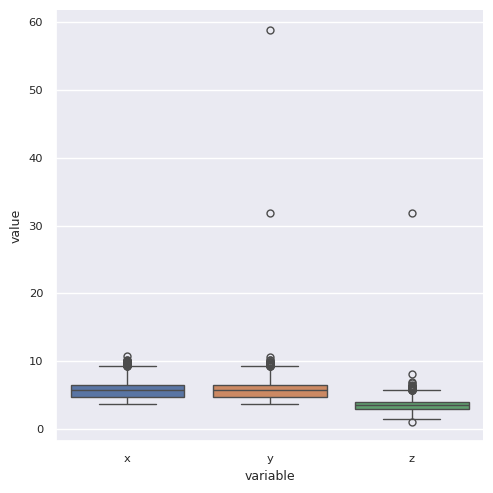

In [242]:
sns.catplot(df[["x", "y", "z"]].melt(), y="value", x="variable", hue="variable", kind="box")

Lådagrammen visar att det finns några extremvärden som vi kan kolla närmare på. 30 verkar vara en rimlig gräns att filtrera på.

In [243]:
df[(df.x >= 30) | (df.y >= 30) | (df.z >= 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


Ett `y`-värde på $58.90$ verkar inte troligt. Inte heller värdena $31.80$. Vi kan använda vår funktion från tidigare för att räkna ut det faktiska `z`-värdet i mittenraden.

In [244]:
sample = df.loc[48410]
(sample.depth/100)*((sample.x+sample.y)/2)

np.float64(3.1734299999999998)

Det ser ut som att decimaltecknet hamnat fel och att $3.18$ (egentligen närmare $3.17$) är det korrekta värdet. Vi kan inte vara helt säkra på att det är så det gått till, men vi chansar. 

In [245]:
df.loc[48410, "z"] = 3.18

För de två diamanterna med fel `y`-värden kan vi skriva om funktionen igen för att få ut $y$.

$$ y = \dfrac{2z}{d/100} - x $$

Vi kan kolla om det stämmer med ett stickprov med data som verkar korrekt.

In [246]:
sample = df.loc[10315] # En lite slumpmässigt vald rad med värden som ser korrekta ut
sample

carat           1.03
cut        Very Good
color              G
clarity          SI1
depth           63.2
table           58.0
price           4764
x               6.43
y               6.38
z               4.05
Name: 10315, dtype: object

In [247]:
print(f"Befintligt y-värde: {sample.y}")
print(f"  Beräknat y-värde: {(2*sample.z)/(sample.depth/100)-sample.x}")


Befintligt y-värde: 6.38
  Beräknat y-värde: 6.386455696202532


Det ser ut att stämma! Vi kan kolla vad `y` borde vara i en av våra felaktiga rader.

In [248]:
sample = df.loc[24067]
sample

carat          2.0
cut        Premium
color            H
clarity        SI2
depth         58.9
table         57.0
price        12210
x             8.09
y             58.9
z             8.06
Name: 24067, dtype: object

In [249]:
(2*sample.z)/(sample.depth/100)-sample.x

np.float64(19.278421052631582)

Nja, det ser inte rätt ut. Det kan vara andra problem med de här värdena. Vi kan fortsätta chansa - kanske har `y` och `z` blandats ihop?

In [250]:
sample.depth/100*(sample.x+sample.z)/2

np.float64(4.756174999999999)

Det ser ut att vara ett rimligare värde på `z`!

Eftersom vi i slutändan inte vet är det nog egentligen klokare att droppa de här två raderna än att hålla på och gissa.

In [251]:
df = df[(df.y < 30)]

Vi kollar hur fördelningen ser ut nu.

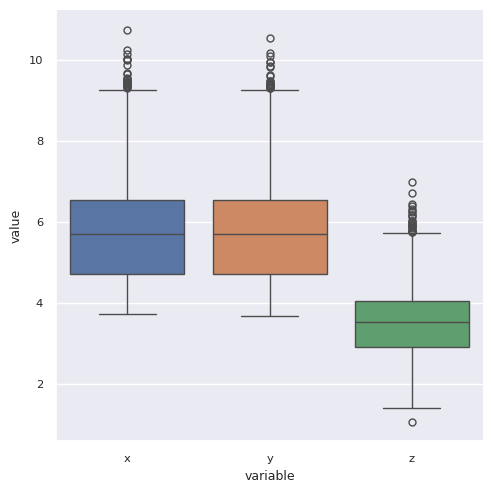

In [252]:
sns.catplot(df[["x", "y", "z"]].melt(), y="value", x="variable", hue="variable", kind="box")

Eftersom vi vet hur vi räknar ut $depth$ kan vi leka med att göra en ny kolumn med beräknade värden och sedan jämföra med de befintliga.

In [253]:
df.loc[:,"calc_depth"] = ((2 * df.z) / (df.x + df.y)) * 100

In [254]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,calc_depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,61.286255
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,59.767141
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,56.896552
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,62.396204
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,63.291139


Nu kan vi kolla hur många rader vi har vars skillnad mellan det befintliga värdet och det beräknade värdet är större än till exempel två standardavvikelser.

In [255]:
len(df[abs(df.depth-df.calc_depth) > 2*df.depth.std()])

37

Vi kan undersöka hur våra beräknade värden (y-axeln) förhåller sig till de befintliga värdena (x-axeln). Vi kan också kolla om `cut`-variabeln verkar ha något med skillnaderna att göra.

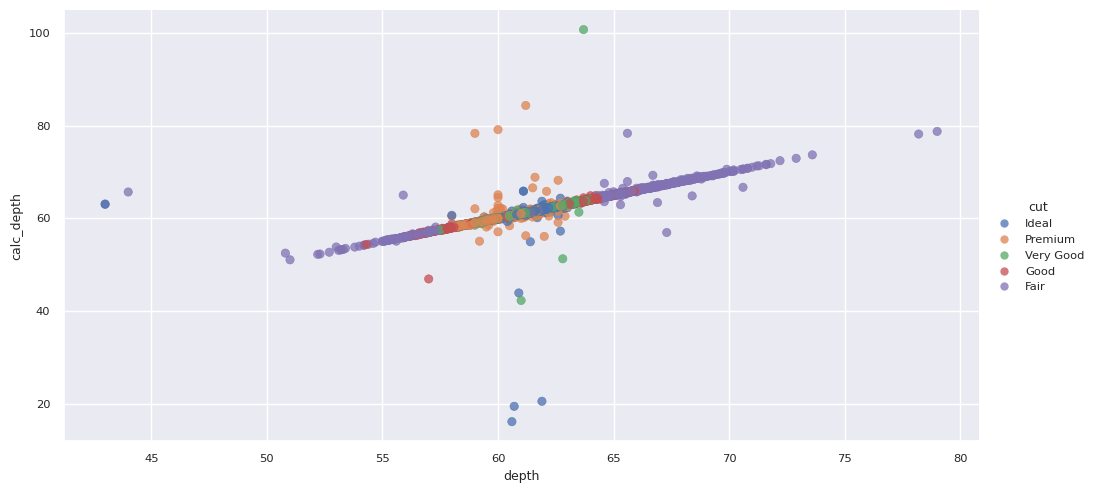

In [256]:
sns.relplot(df, x="depth", y="calc_depth", hue="cut", aspect=2, alpha=.75, edgecolor=None)

Det verkar eventuellt finnas ett samband mellan `cut` och hur fel våra beräkningar är.

Vi gör en kolumn till, som innehåller roten ur differensen i kvadrat mellan vårt beräknade värde och det befintliga värdet (ett slags standardavvikelse):

In [257]:
df.loc[:,"depth_diff"] = np.sqrt((df.depth-df.calc_depth)**2)

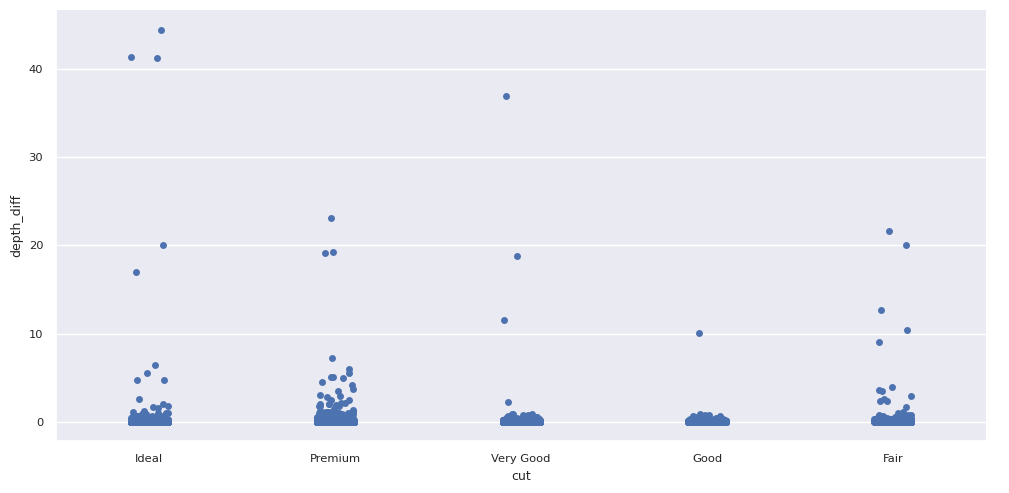

In [258]:
sns.catplot(df, x="cut", y="depth_diff", kind="strip", aspect=2)

Vi skulle kunna fortsätta ner i det här kaninhålet och se om det finns något mönster som kan förklara varför de här skiljer sig så mycket, men nu är det dags att lämna datatvätten och börja med vår...

## Analys
Under vår datatvätt skapade vi några kolumner som vi inte behöver i själva analysen.

In [259]:
df = df.drop(["calc_depth", "depth_diff"], axis=1)



Grunden för vår analys skulle kunna vara att försöka ta reda på vad som påverkar priset på en diamant. Vi kollar hur priserna är fördelade.

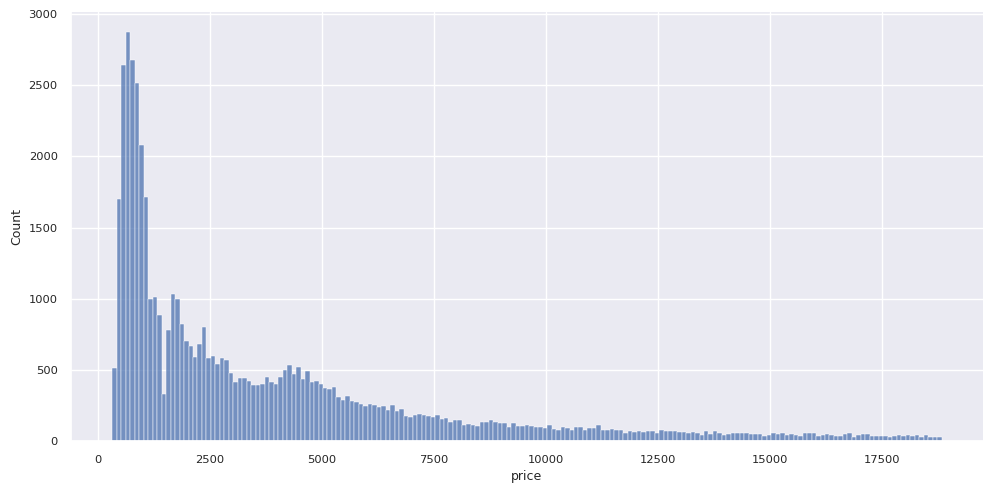

In [260]:
sns.displot(df, x="price", binwidth=100, aspect=2)

Den absoluta toppen av värden verkar finnas under 2500 nånstans. Vi kan filtera bort alla diamanter med ett pris över 2500 och titta närmare på de billigaste diamanterna.

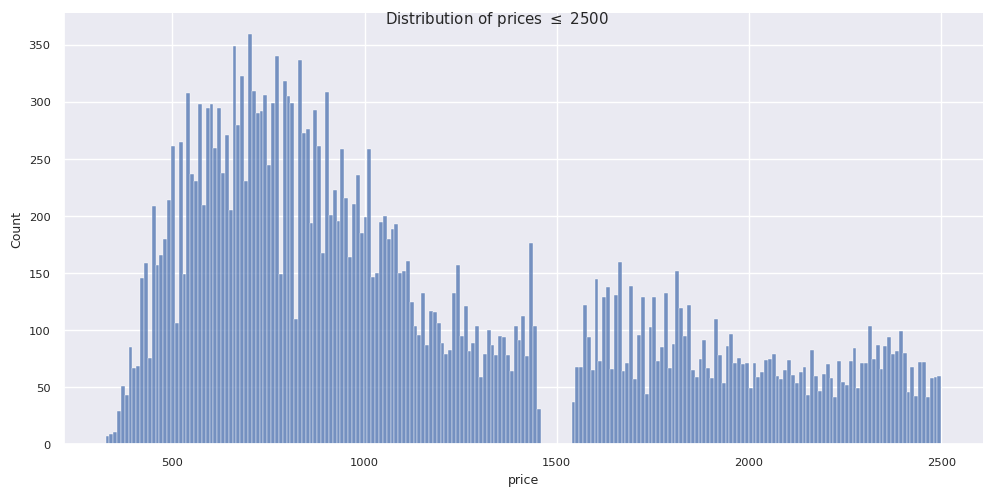

In [261]:
sns.displot(df[df.price <= 2500], x="price", binwidth=10, aspect=2).figure.suptitle(r"Distribution of prices $\leq$ 2500");

Här är ett märkligt gap precis runt 1500?

### Korrelationsmatrisen

Vi kan kolla på korrelationsmatrisen för att kolla om det verkar finnas några samband mellan variablerna.

`DataFrames` har en `corr()`-metod som returnerar en korrelationsmatrik. Den fungerar dock bara med numeriska värden, så vi får filtrera `df` med `select_dtypes()`-metoden och ange att vi bara vill behålla kolumner med numeriska datatyper.

Sen använder vi Seaborns `heatmap()` för att visualisera korrelationsmatrisen.

In [262]:
df.select_dtypes(include=["int", "float"]).corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027948,0.181137,0.921561,0.977842,0.976924,0.976518
depth,0.027948,1.000000,-0.297566,-0.011008,-0.025228,-0.028343,0.096321
table,0.181137,-0.297566,1.000000,0.126591,0.195492,0.189310,0.155154
price,0.921561,-0.011008,0.126591,1.000000,0.887123,0.888714,0.882001
x,0.977842,-0.025228,0.195492,0.887123,1.000000,0.998654,0.991090
y,0.976924,-0.028343,0.189310,0.888714,0.998654,1.000000,0.990746
z,0.976518,0.096321,0.155154,0.882001,0.991090,0.990746,1.000000


<Axes: >

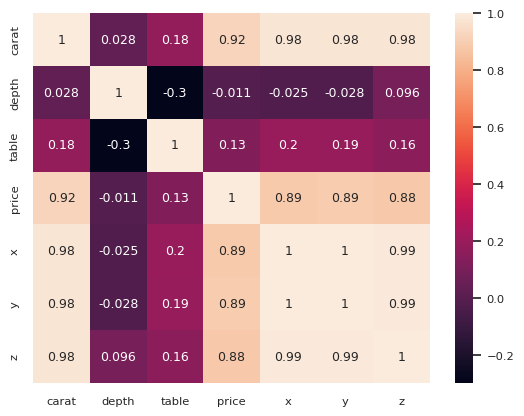

In [263]:
sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), annot=True)

En korrelationsmatris visar alltså *korrelationskoefficienten* mellan två variabler. Den är alltså ett tal mellan -1 och 1. 1 betyder perfekt positiv korrelation, -1 betyder perfekt negativ korrelation, och 0 betyder ingen korrelation.

Om vi är ute efter att veta vad som påverkar priset på en diamant, är `price`-kolumnen (eller raden) kanske den mest intressanta. `table` och `depth` har båda låga koefficienter, så dem kan vi strunta i framöver.

Variablerna `x`, `y` och `z` beskriver diamantens dimensioner, alltså hur stor den är. 

`carat` beskriver diamantens vikt, vilket bör vara ungefär samma sak om vi tänker oss att alla diamanter har samma massa. Vi ser att de är starkt korrelerade - kanske räcker det med `carat`?

Vi kollar hur dimensionsvariablerna `x`, `y`och `z` förhåller sig till `carat`.

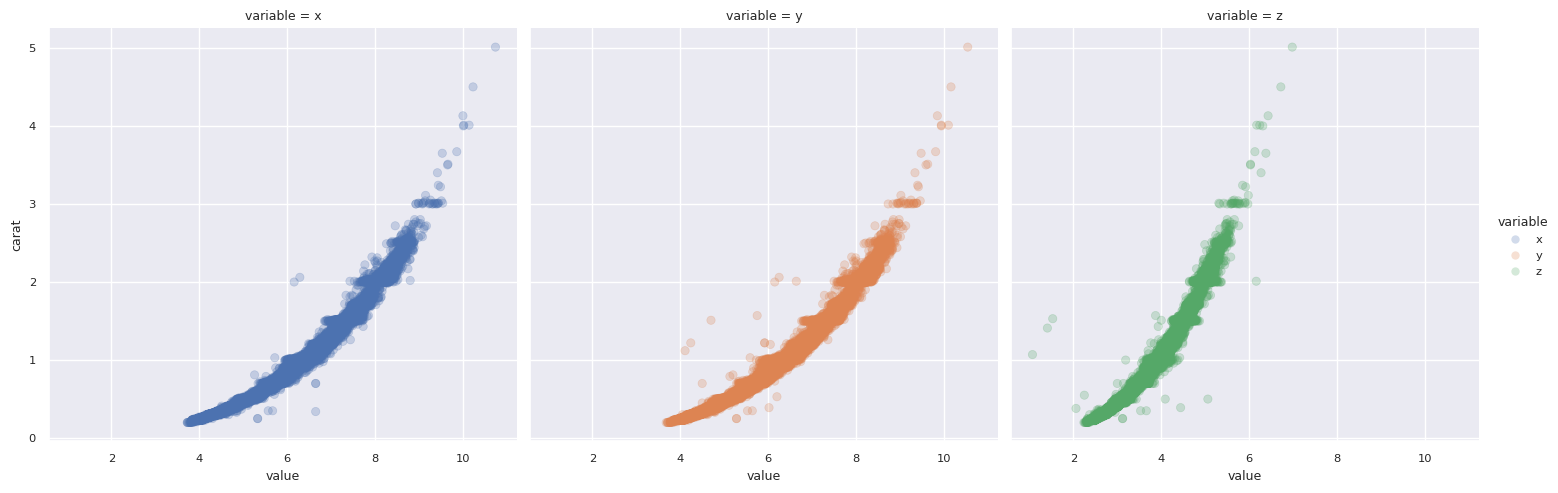

In [264]:
sns.relplot(df[["carat", "x", "y", "z"]].melt(id_vars="carat"), x="value", y="carat", col="variable", hue="variable", alpha=.25, edgecolor=None)

Det verkar inte som att dimensionsvariablerna kommer att ge oss särskilt mycket mer information än den som redan finns i `carat`, men vi kan också leka med att skapa en ny variabel - `volume`, och se hur den förhåller sig till såväl `carat`.

In [265]:
df.loc[:, "volume"] = df.x * df.y * df.z

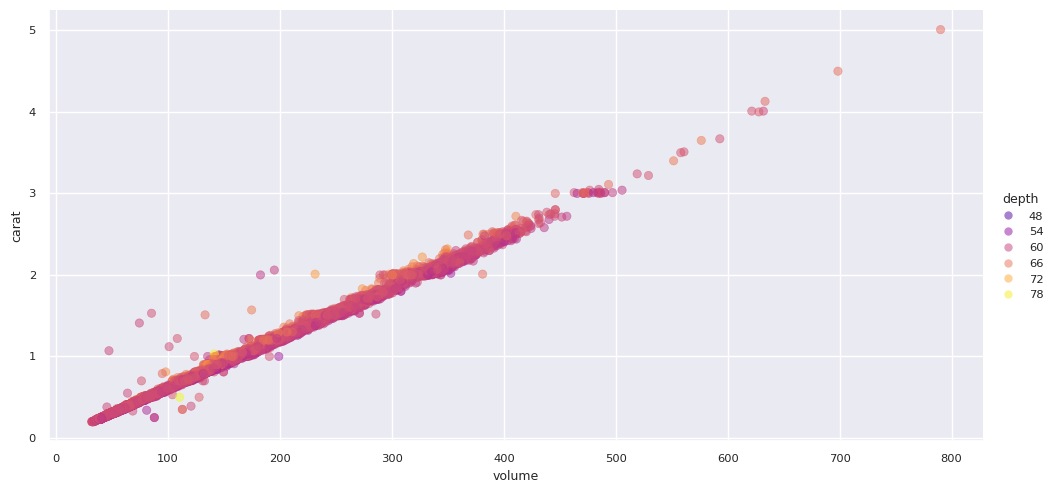

In [266]:
sns.relplot(df[(df.y < 30) & (df.z < 30) & (df.x > 0) & (df.y > 0) & (df.z > 0)], x="volume", y="carat", hue="depth", palette="plasma", aspect=2, alpha=.5, edgecolor=None)



### `carat`

Vi kollar närmare på `carat`-kolumnen.

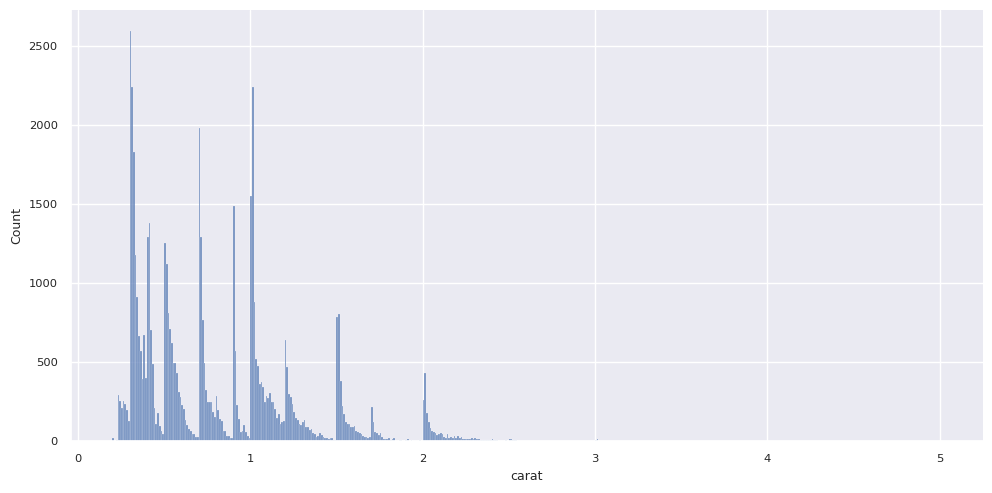

In [267]:
sns.displot(df, x="carat", binwidth=.01, aspect=2)

Eftersom det finns ett fåtal diamanter med höga värden i `carat` är det svårt att se. Vi kan filtera ut alla som har ett värde i `carat` under 3.

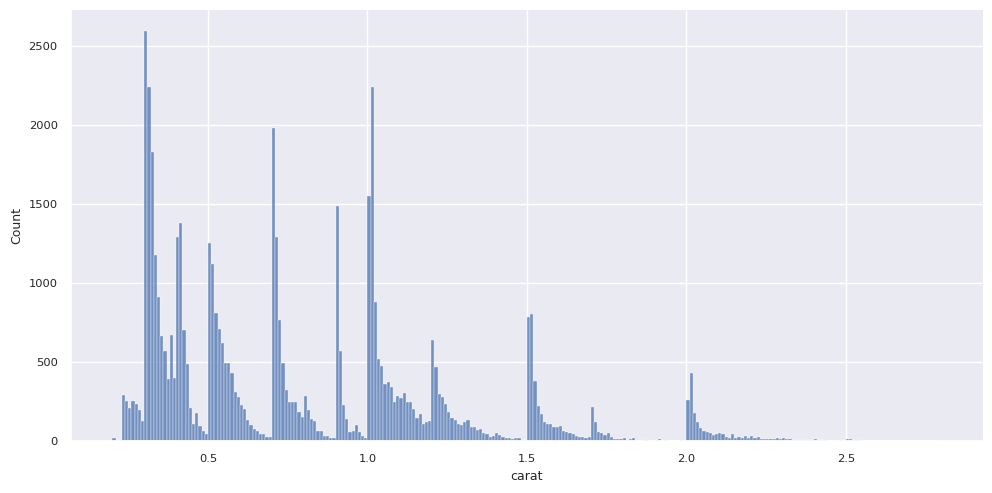

In [268]:
sns.displot(df[df.carat < 3], x="carat", aspect=2, binwidth=.01)

Vi ser att fördelningen ser lite märklig ut. Det är vanligast med värden runt heltalen, med små spikar runt .25, .5, och .75 och en liten svans till höger.

### `carat` vs. `price`

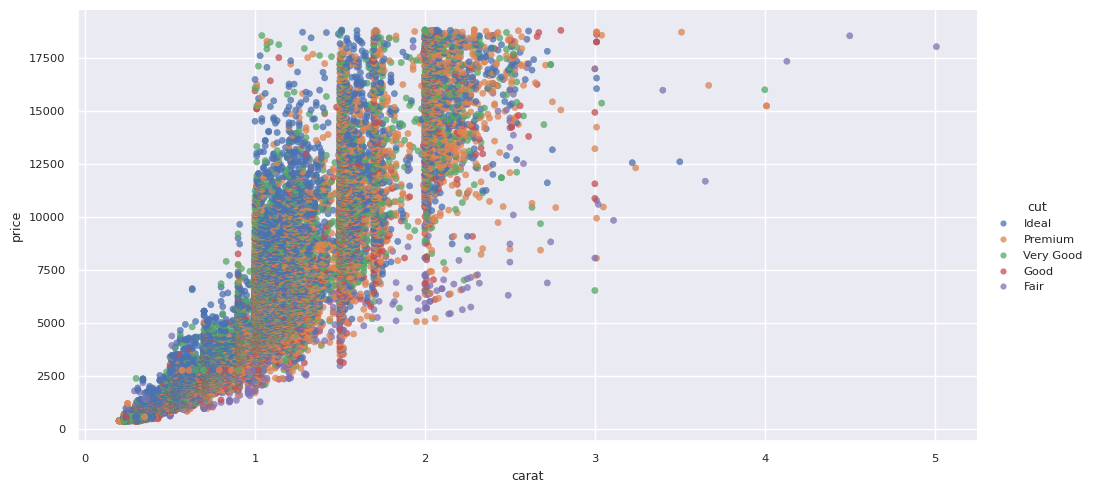

In [269]:
sns.relplot(df, x="carat", y="price", hue="cut", s=20, aspect=2, alpha=.75, edgecolor=None)

Det finns ett positivt samband mellan `carat` och `price`. Vi ser också att de allra största diamanterna har den sämsta `cut`en Fair, men är ändå bland de dyraste. Det talar för att stora diamanter inte behöver skäras så bra för att vara dyra.

Vi kan titta närmare på diamanter mellan ungefär $1.25$ och $1.75$ `carat`.


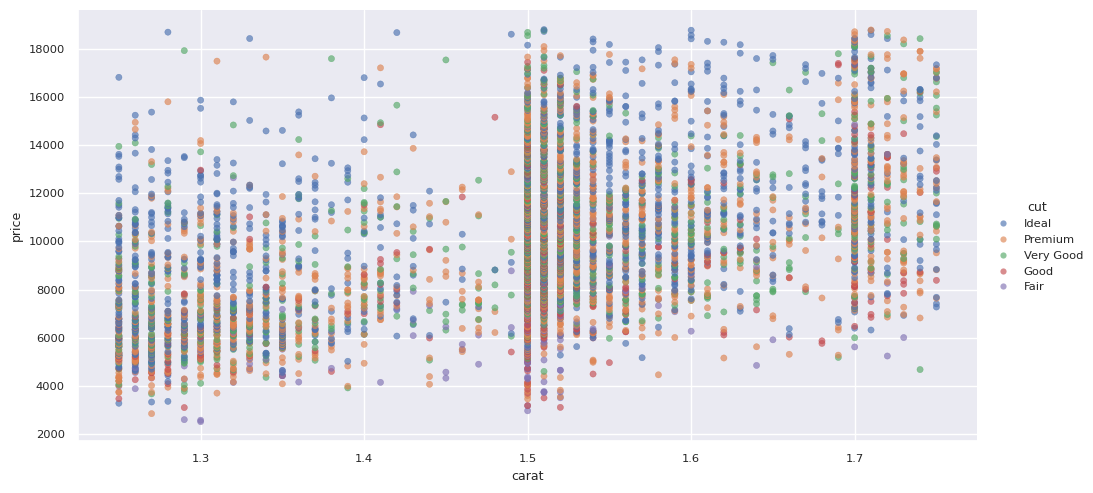

In [270]:
sns.relplot(df[(df.carat >= 1.25) & (df.carat <= 1.75)], x="carat", y="price", hue="cut", s=20, aspect=2, alpha=.65, edgecolor=None)

Det verkar som att ett bättre `cut`-värde generellt bidrar till ett högre pris vid lägre `carat`. (Titta efter samlingar av blåa och orangea prickar i toppen, och röda och lila i botten.)



### Kontinuerlig variabel till kategorisk

`carat` är en kontinuerlig variabel. Vi kan använda funktionen `cut()` för att dela upp dem i *bins* och göra om den till en kategorisk variabel som vi kan göra *boxplots* av.

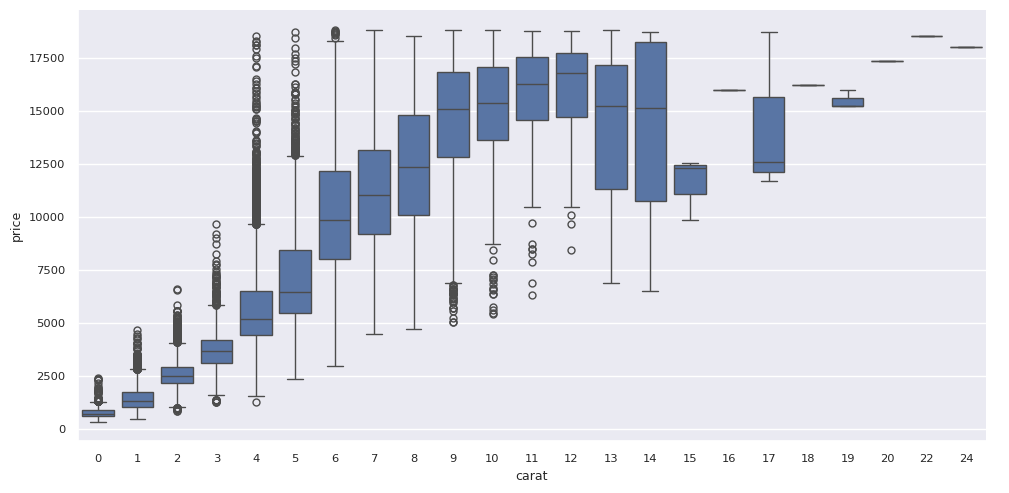

In [271]:
sns.catplot(x=pd.cut(df.carat, bins=25, retbins=False, labels=False), y=df.price, kind="box", aspect=2)

Den här är intressant! Vi ser att grupperna med lite lägre `carat`, 0-5, har väldigt stor spridning på priserna (det är många *outliers*, representerade av cirklar). Det talar om för att oss det finns en eller flera andra variabler som är bättre på att förklara variansen i priser än vad `carat` är när diamanten är liten. Vid högre `carat` verkar det som att `carat` är bättre på att förklara variansen.

Vi gör en plot till, den här gången med färre grupper, som försöker fånga in hela `carat`-värden, och ser hur medelpriset varierar mot `carat` och `cut`.

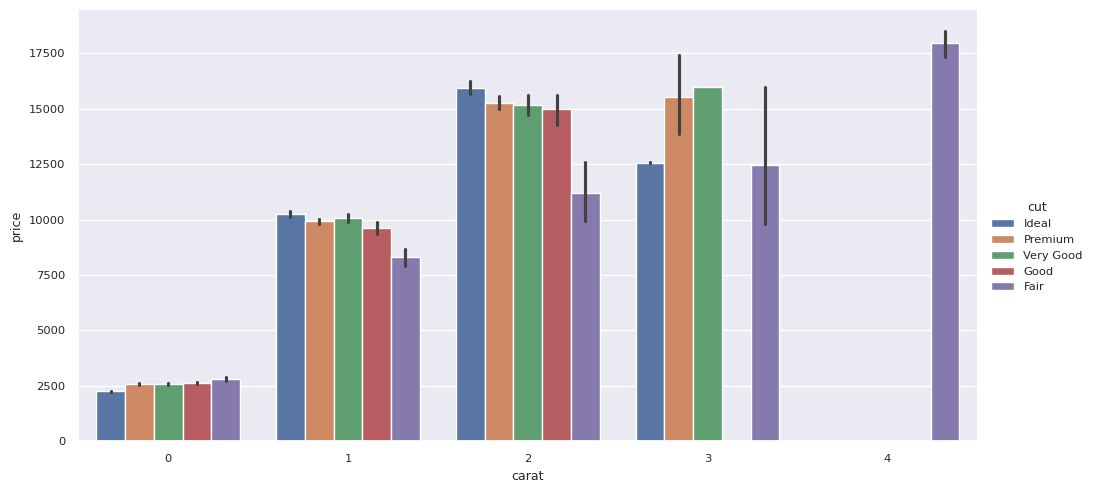

In [272]:
sns.catplot(x=pd.cut(df.carat, bins=5, retbins=False, labels=False), y=df.price, hue=df.cut, kind="bar", aspect=2)

Här ser vi också att mellan runt 1-2 `carat` verkar `cut`-variabeln bidra till ett högre pris. (Det svarta strecket är konfidensintervallet.)

### Kategoriska variabler

Vi avslutar med lite olika plottar för våra kategoriska variabler, `cut`, `color` och `clarity`.

Vi använder *countplots* för att se hur många diamanter som tillhör varje kategori, lådagram, och *strip plots* för att visualisera relationen mellan kategorin och `price` på ett lite annat sätt än lådagrammen.

#### `cut`

In [285]:
cut_order = df.cut.cat.categories[::-1] # Vi vill visa kategorierna från sämst till bäst, så vi vänder på sorteringen.

<Axes: xlabel='cut', ylabel='count'>

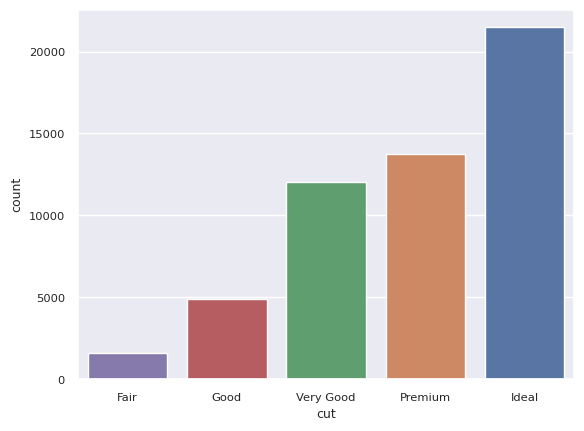

In [274]:
sns.countplot(df, x="cut", hue="cut", order=cut_order)

`Fair` är ovanligast, `Ideal` är vanligast.

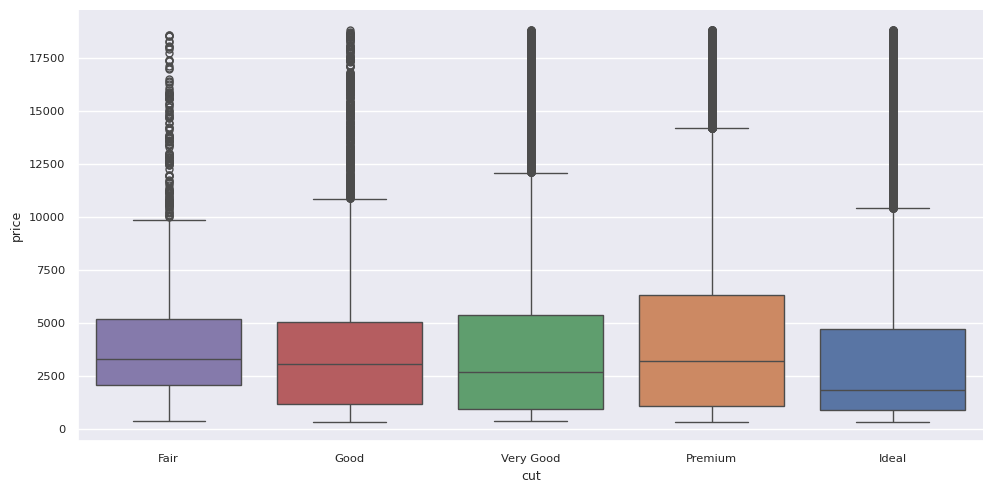

In [275]:
sns.catplot(df, x="cut", y="price", hue="cut", kind="box", aspect=2, order=cut_order)

`Ideal` har det lägsta medelpriset, trots att det är den bästa `cut`en.

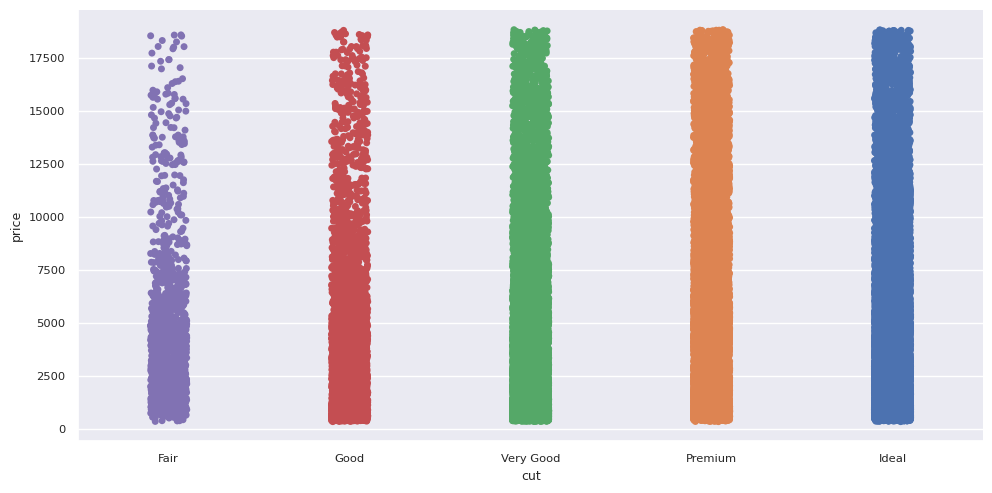

In [276]:
sns.catplot(df, x="cut", y="price", hue="cut", aspect=2, order=cut_order)

`Fair` har inte så många dyra diamanter, men de finns (vi såg dem tidigare - det är de största diamanterna).

#### `color`

In [277]:
color_order = df.color.cat.categories[::-1]

<Axes: xlabel='color', ylabel='count'>

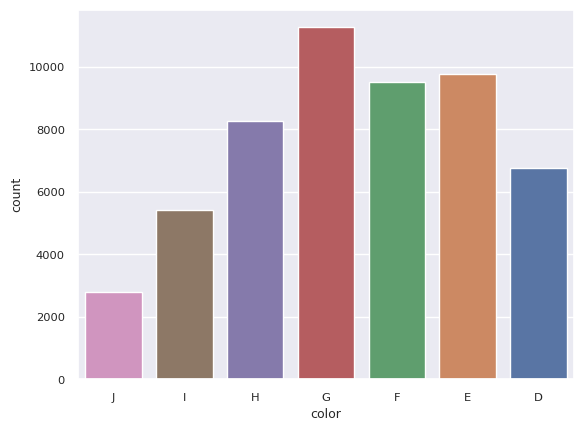

In [278]:
sns.countplot(df, x="color", hue="color", order=color_order)

`G` är den vanligaste färgen, och vi närmar oss normalfördelningen. Det kan bero på att `color` är en naturlig egenskap hos diamanterna, medan många av de andra kategorierna är resultat av bearbetning.

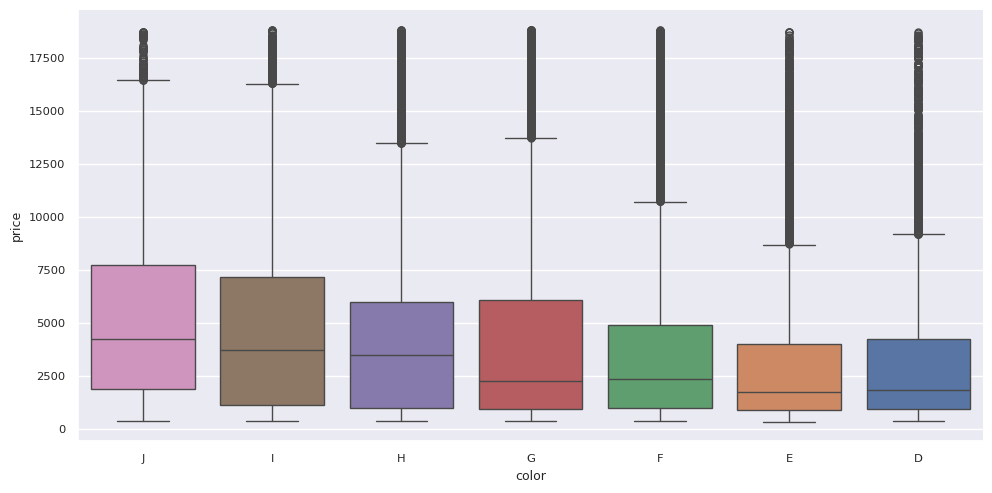

In [279]:
sns.catplot(df, x="color", y="price", hue="color", kind="box", aspect=2, order=color_order)

Färgerna med de högsta medelprisen (`J` och `I`) är faktiskt de som räknas som de sämsta. Den bästa färgen har lägst medelpris.

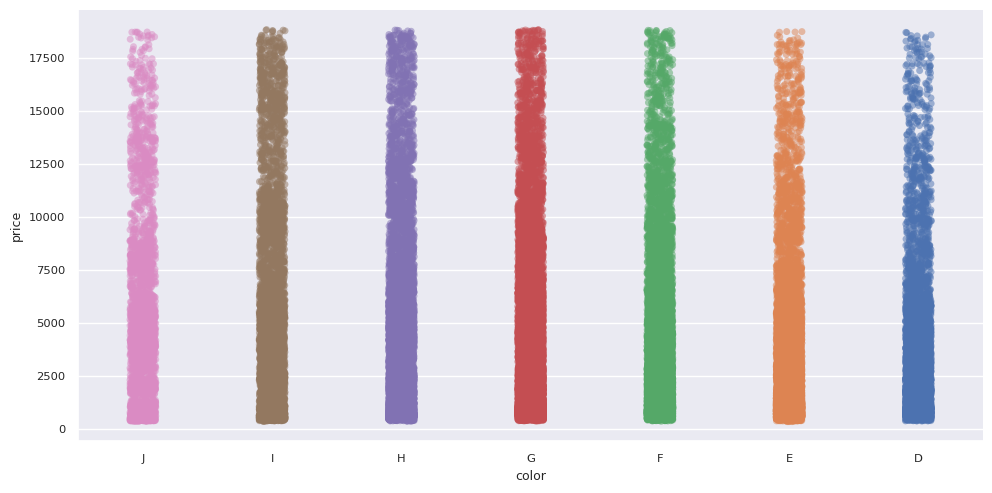

In [280]:
sns.catplot(df, x="color", y="price", hue="color", kind="strip", aspect=2, alpha=.5, order=color_order)

#### `clarity`

In [281]:
clarity_order = df.clarity.cat.categories[::-1]

<Axes: xlabel='clarity', ylabel='count'>

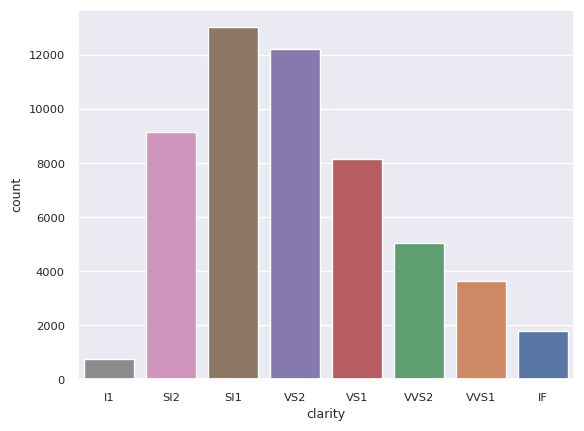

In [282]:
sns.countplot(df, x="clarity", hue="clarity", order=clarity_order)

`clarity` pekar också mot något slags normalfördelning, fast med en viss tyngd åt vänster. Även här kan vi tänka att vi har att göra med en naturlig egenskap hos diamanterna.

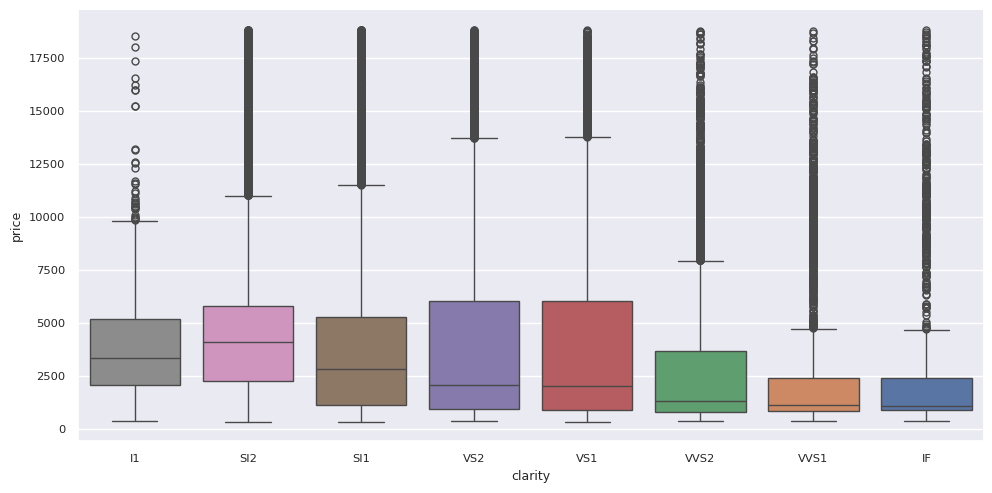

In [283]:
sns.catplot(df, x="clarity", y="price", hue="clarity", kind="box", aspect=2, order=clarity_order)

Den näst sämsta `clarity`n (`SI2`) har det högsta medelpriset. Den bästa `clarityn` (`IF`) har det lägsta.

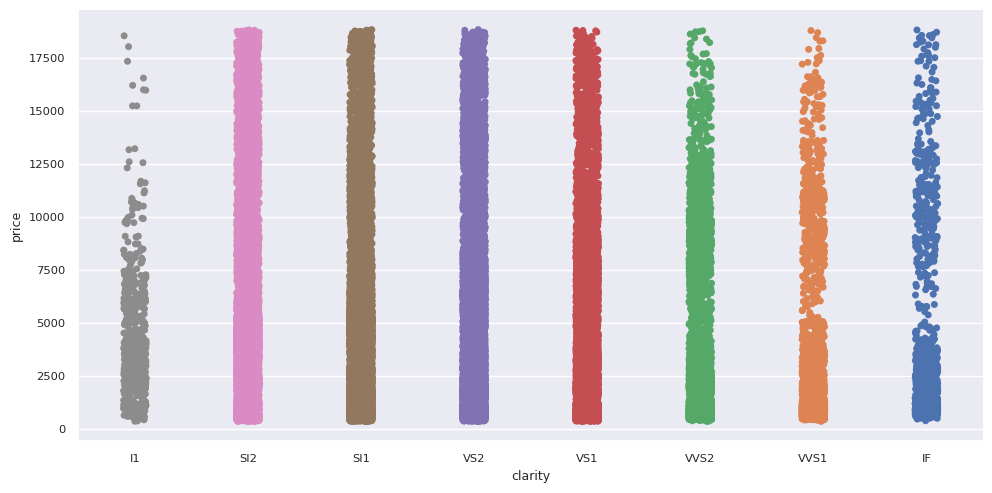

In [284]:
sns.catplot(df, x="clarity", y="price", hue="clarity", kind="strip", aspect=2, order=clarity_order)

Ingen av våra kategoriska variabler verkar kunna förklara variansen i pris för sig själv. Troligtvis är det en kombination, där även `carat` spelar en stor roll (framförallt när det gäller de största diamanterna).